In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
banknote_data = pd.read_csv("../Datasets/banknote.csv",sep=',')

In [6]:
banknote_data.head()

variance  skewness  kurtosis  entropy  authentic
0   3.62160    8.6661   -2.8073 -0.44699          0
1   4.54590    8.1674   -2.4586 -1.46210          0
2   3.86600   -2.6383    1.9242  0.10645          0
3   3.45660    9.5228   -4.0112 -3.59440          0
4   0.32924   -4.4552    4.5718 -0.98880          0

In [7]:
banknote_data= banknote_data.round()

In [8]:
banknote_data.head()

variance  skewness  kurtosis  entropy  authentic
0       4.0       9.0      -3.0     -0.0          0
1       5.0       8.0      -2.0     -1.0          0
2       4.0      -3.0       2.0      0.0          0
3       3.0      10.0      -4.0     -4.0          0
4       0.0      -4.0       5.0     -1.0          0

In [9]:
X = banknote_data.values[:,0:4]
Y = banknote_data.values[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=50)

In [12]:
mlp.fit(X_train,Y_train)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
predictions = mlp.predict(X_test)

In [14]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))

Confusion Matrix:

 [[157   6]
 [ 73  39]]


Classification Report:

              precision    recall  f1-score   support

          0       0.68      0.96      0.80       163
          1       0.87      0.35      0.50       112

avg / total       0.76      0.71      0.68       275



In [15]:
print(mlp.predict_proba(X_test))

[[0.63801713 0.36198287]
 [0.8090881  0.1909119 ]
 [0.57719157 0.42280843]
 [0.88573201 0.11426799]
 [0.88119146 0.11880854]
 [0.88597446 0.11402554]
 [0.25931577 0.74068423]
 [0.8154694  0.1845306 ]
 [0.3901529  0.6098471 ]
 [0.79527736 0.20472264]
 [0.88399306 0.11600694]
 [0.6255615  0.3744385 ]
 [0.34857717 0.65142283]
 [0.70460848 0.29539152]
 [0.68343129 0.31656871]
 [0.92103009 0.07896991]
 [0.6761259  0.3238741 ]
 [0.81509504 0.18490496]
 [0.81435191 0.18564809]
 [0.62512252 0.37487748]
 [0.3176045  0.6823955 ]
 [0.73605598 0.26394402]
 [0.76874232 0.23125768]
 [0.5170547  0.4829453 ]
 [0.59737331 0.40262669]
 [0.79495655 0.20504345]
 [0.76599934 0.23400066]
 [0.41567006 0.58432994]
 [0.7210619  0.2789381 ]
 [0.49248698 0.50751302]
 [0.59737331 0.40262669]
 [0.90409989 0.09590011]
 [0.71317138 0.28682862]
 [0.71475192 0.28524808]
 [0.80906647 0.19093353]
 [0.83279075 0.16720925]
 [0.62512252 0.37487748]
 [0.67037833 0.32962167]
 [0.6733666  0.3266334 ]
 [0.62265179 0.37734821]


Experimenting with more iterations, more hidden layers

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(6),max_iter=100000)
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)

In [17]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Confusion Matrix:

 [[163   0]
 [  0 112]]


Classification Report:

              precision    recall  f1-score   support

          0       1.00      1.00      1.00       163
          1       1.00      1.00      1.00       112

avg / total       1.00      1.00      1.00       275

Accuracy:100.00%
Misclassified samples: 0


As we can see above, accuracy has improved.

In [18]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0      318   45      49       49       65       65     45          0
1      405   60      62       63       80       80     60          0
2      525   80      82       83      100      100     80          0
3      625   80     100      123      122      120     80          0
4      309   39      52       43       60       50     65          0
5      405   58      64       58       80       65     80          0
6      534   78      84       78      109       85    100          0
7      634   78     130      111      130       85    100          0
8      634   78     104       78      159      115    100          0
9      314   44      48       65       50       64     43          0
10     405   59      63       80       65       80     58          0
11     530   79      83      100       85      105     78          0
12     630   79     103      120      135      115     78          0
13     195   45      30       35       20       20     45          0
14     205   50      20       55       25       25     30          0
15     395   60      45       50       90       80     70          0
16     195   40      35       30       20       20     50          0
17     205   45      25       50       25       25     35          0
18     395   65      90       40       45       80     75          0
19     495   65     150       40       15       80    145          0
20     251   40      45       40       35       35     56          0
21     349   63      60       55       50       50     71          0
22     479   83      80       75       70       70    101          0
23     579   83      80       80      135       80    121          0
24     253   30      56       35       25       35     72          0
25     413   55      81       60       50       70     97          0
26     262   40      60       30       31       31     70          0
27     442   65      90       65       61       61    100          0
28     288   35      60       44       40       54     55          0
29     438   60      85       69       65       79     80          0
..     ...  ...     ...      ...      ...      ...    ...        ...
770    525   95      65       65      110      130     60          0
771    500   78      92       75       74       63    118          0
772    431   67      58       57       81       67    101          0
773    500   50      50      150       50      150     50          0
774    300   45      50       35       55       75     40          0
775    452   68      75       53       83      113     60          0
776    600   90     100       70      110      150     80          0
777    470   57      80       91       80       87     75          0
778    309   43      70       48       50       60     38          0
779    474   85     110       76       65       82     56          0
780    335   49      66       70       44       55     51          0
781    335   44      66       70       44       55     56          0
782    335   54      66       70       44       55     46          0
783    335   59      66       70       44       55     41          0
784    494   65      90      122       58       75     84          0
785    494   55      85      122       58       75     99          0
786    494   75      95      122       58       75     69          0
787    494   85     100      122       58       75     54          0
788    304   55      69       85       32       35     28          0
789    514   95     117      184       44       46     28          0
790    245   40      30       35       45       40     55          0
791    535   85      70       80       97       80    123          0
792    680  126     131       95      131       98     99          1
793    680  126     131       95      131       98     99          1
794    600  108     100      121       81       95     95          1
795    600   50     100      150      100      150     50          1
796

In [19]:
pkmn

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0      318   45      49       49       65       65     45          0
1      405   60      62       63       80       80     60          0
2      525   80      82       83      100      100     80          0
3      625   80     100      123      122      120     80          0
4      309   39      52       43       60       50     65          0
5      405   58      64       58       80       65     80          0
6      534   78      84       78      109       85    100          0
7      634   78     130      111      130       85    100          0
8      634   78     104       78      159      115    100          0
9      314   44      48       65       50       64     43          0
10     405   59      63       80       65       80     58          0
11     530   79      83      100       85      105     78          0
12     630   79     103      120      135      115     78          0
13     195   45      30       35       20       20     45          0
14     205   50      20       55       25       25     30          0
15     395   60      45       50       90       80     70          0
16     195   40      35       30       20       20     50          0
17     205   45      25       50       25       25     35          0
18     395   65      90       40       45       80     75          0
19     495   65     150       40       15       80    145          0
20     251   40      45       40       35       35     56          0
21     349   63      60       55       50       50     71          0
22     479   83      80       75       70       70    101          0
23     579   83      80       80      135       80    121          0
24     253   30      56       35       25       35     72          0
25     413   55      81       60       50       70     97          0
26     262   40      60       30       31       31     70          0
27     442   65      90       65       61       61    100          0
28     288   35      60       44       40       54     55          0
29     438   60      85       69       65       79     80          0
..     ...  ...     ...      ...      ...      ...    ...        ...
770    525   95      65       65      110      130     60          0
771    500   78      92       75       74       63    118          0
772    431   67      58       57       81       67    101          0
773    500   50      50      150       50      150     50          0
774    300   45      50       35       55       75     40          0
775    452   68      75       53       83      113     60          0
776    600   90     100       70      110      150     80          0
777    470   57      80       91       80       87     75          0
778    309   43      70       48       50       60     38          0
779    474   85     110       76       65       82     56          0
780    335   49      66       70       44       55     51          0
781    335   44      66       70       44       55     56          0
782    335   54      66       70       44       55     46          0
783    335   59      66       70       44       55     41          0
784    494   65      90      122       58       75     84          0
785    494   55      85      122       58       75     99          0
786    494   75      95      122       58       75     69          0
787    494   85     100      122       58       75     54          0
788    304   55      69       85       32       35     28          0
789    514   95     117      184       44       46     28          0
790    245   40      30       35       45       40     55          0
791    535   85      70       80       97       80    123          0
792    680  126     131       95      131       98     99          1
793    680  126     131       95      131       98     99          1
794    600  108     100      121       81       95     95          1
795    600   50     100      150      100      150     50          1
796

In [20]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
s = sb.pairplot(pkmn, hue="Legendary",height = 3,vars=["HP","Attack","Defense","Sp. Atk", "Sp. Def"],palette="husl")

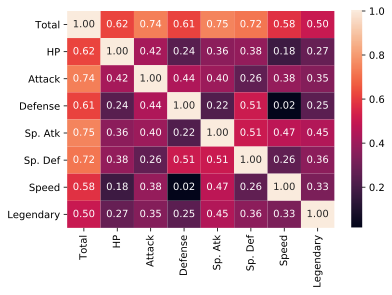

In [21]:
heat = sb.heatmap(pkmn.corr(),annot=True, fmt='.2f')

Iteration 1, loss = 1.82288461
Iteration 2, loss = 1.82288457
Iteration 3, loss = 1.82288453
Iteration 4, loss = 1.82288448
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


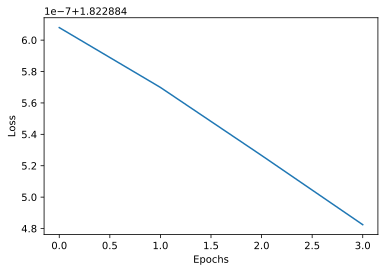

In [22]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 2)
mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=1000, verbose=True, random_state=1)
mlp.fit(X_train,Y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('LossvsEpoch.png')
plt.show()

In [23]:
predictions = mlp.predict(X_test)

In [24]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Confusion Matrix:

 [[293   0]
 [ 27   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       293
          1       0.00      0.00      0.00        27

avg / total       0.84      0.92      0.88       320

Accuracy:91.56%
Misclassified samples: 27


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print(mlp.predict_proba(X_test))

[[1.00000000e+00 1.90503003e-28]
 [1.00000000e+00 3.52505396e-40]
 [1.00000000e+00 5.71182784e-44]
 [1.00000000e+00 3.62777802e-30]
 [1.00000000e+00 8.37488674e-39]
 [1.00000000e+00 2.29364652e-22]
 [1.00000000e+00 3.70306498e-21]
 [1.00000000e+00 7.43335503e-28]
 [1.00000000e+00 1.03678591e-19]
 [1.00000000e+00 1.71663230e-30]
 [1.00000000e+00 7.43307667e-24]
 [1.00000000e+00 1.74319528e-31]
 [1.00000000e+00 1.19772124e-34]
 [1.00000000e+00 8.68914103e-24]
 [1.00000000e+00 2.90814173e-26]
 [1.00000000e+00 1.30415355e-26]
 [1.00000000e+00 1.57183407e-30]
 [1.00000000e+00 1.34274105e-19]
 [1.00000000e+00 7.93552882e-30]
 [1.00000000e+00 3.51790232e-32]
 [1.00000000e+00 3.47861574e-25]
 [1.00000000e+00 1.19113369e-42]
 [1.00000000e+00 5.16347510e-15]
 [1.00000000e+00 3.86555864e-42]
 [1.00000000e+00 2.06736594e-31]
 [1.00000000e+00 3.47605352e-27]
 [1.00000000e+00 7.61371275e-20]
 [1.00000000e+00 3.64714771e-28]
 [1.00000000e+00 1.63839848e-21]
 [1.00000000e+00 1.30284342e-40]
 [1.000000

Experimenting with Input layers, Iterations and Hidden layers

Case 1(b) - Max Input Layers, 3 Hidden Layers, 1000 Iterations

Iteration 1, loss = 9.16367770
Iteration 2, loss = 1.82350280
Iteration 3, loss = 6.35302893
Iteration 4, loss = 1.82348406
Iteration 5, loss = 1.82347278
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


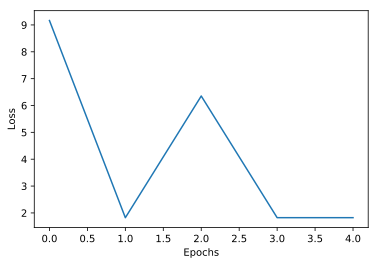

Confusion Matrix:

 [[293   0]
 [ 27   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       293
          1       0.00      0.00      0.00        27

avg / total       0.84      0.92      0.88       320

Accuracy:91.56%
Misclassified samples: 27


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
#y = pkmn['Legendary'].values
#X = pkmn.values[:,:-1]
#X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000),max_iter=1000, verbose=True, random_state=1)
mlp.fit(X_train,Y_train) 

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 1(c) - Max Input Layers, 10 Hidden Layers, 1000 Iterations

Iteration 1, loss = 0.59356132
Iteration 2, loss = 0.43027047
Iteration 3, loss = 0.38461819
Iteration 4, loss = 0.37788270
Iteration 5, loss = 0.36262828
Iteration 6, loss = 0.35596659
Iteration 7, loss = 0.36238594
Iteration 8, loss = 0.37143839
Iteration 9, loss = 0.34704897
Iteration 10, loss = 0.33683504
Iteration 11, loss = 0.34483746
Iteration 12, loss = 0.32461115
Iteration 13, loss = 0.31746164
Iteration 14, loss = 0.30399130
Iteration 15, loss = 0.30553149
Iteration 16, loss = 0.31844577
Iteration 17, loss = 0.28680787
Iteration 18, loss = 0.28430198
Iteration 19, loss = 0.27877705
Iteration 20, loss = 0.27532859
Iteration 21, loss = 0.29390088
Iteration 22, loss = 0.32688495
Iteration 23, loss = 0.36757275
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


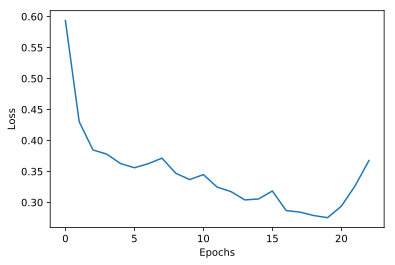

Confusion Matrix:

 [[293   0]
 [ 27   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96       293
          1       0.00      0.00      0.00        27

avg / total       0.84      0.92      0.88       320

Accuracy:91.56%
Misclassified samples: 27


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#y = pkmn['Legendary'].values
#X = pkmn.values[:,:-1]
#X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(a) - 1 Input Layer, 2 Hidden Layers, 1000 Iterations

Iteration 1, loss = 1.76284815
Iteration 2, loss = 0.74040531
Iteration 3, loss = 1.00999462
Iteration 4, loss = 1.04534325
Iteration 5, loss = 0.92588914
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


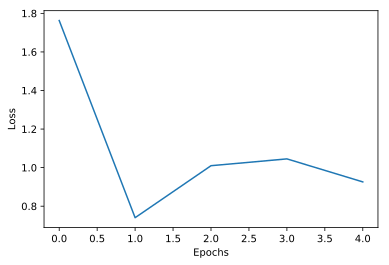

Confusion Matrix:

 [[291   0]
 [ 29   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.91      1.00      0.95       291
          1       0.00      0.00      0.00        29

avg / total       0.83      0.91      0.87       320

Accuracy:90.94%
Misclassified samples: 29


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
y = pkmn['Legendary'].values
X = pkmn.values[:,3:4]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(b) - 3 Input Layers, 2 Hidden Layers, 1000 Iterations

Iteration 1, loss = 5.64579131
Iteration 2, loss = 1.71210599
Iteration 3, loss = 1.72697134
Iteration 4, loss = 1.72697091
Iteration 5, loss = 1.72697044
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


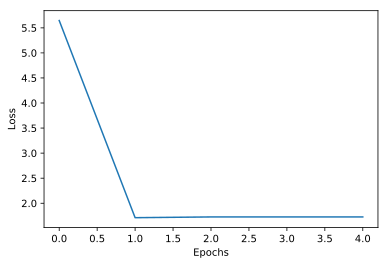

Confusion Matrix:

 [[291   0]
 [ 29   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.91      1.00      0.95       291
          1       0.00      0.00      0.00        29

avg / total       0.83      0.91      0.87       320

Accuracy:90.94%
Misclassified samples: 29


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:3]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(c) - 5 Input Layers, 2 Hidden Layers, 1000 Iterations

Iteration 1, loss = 2.82887398
Iteration 2, loss = 1.72697462
Iteration 3, loss = 1.72697279
Iteration 4, loss = 1.72697273
Iteration 5, loss = 1.24919240
Iteration 6, loss = 1.70395905
Iteration 7, loss = 1.10413955
Iteration 8, loss = 1.44391994
Iteration 9, loss = 0.88825873
Iteration 10, loss = 0.86184198
Iteration 11, loss = 0.57762552
Iteration 12, loss = 0.55379427
Iteration 13, loss = 0.42788629
Iteration 14, loss = 0.39949726
Iteration 15, loss = 0.38177517
Iteration 16, loss = 0.32675336
Iteration 17, loss = 0.33067920
Iteration 18, loss = 0.32182958
Iteration 19, loss = 0.29368757
Iteration 20, loss = 0.31431097
Iteration 21, loss = 0.36010769
Iteration 22, loss = 0.32027322
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


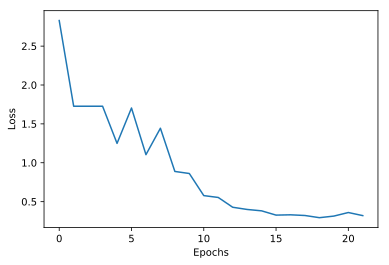

Confusion Matrix:

 [[291   0]
 [ 29   0]]


Classification Report:

              precision    recall  f1-score   support

          0       0.91      1.00      0.95       291
          1       0.00      0.00      0.00        29

avg / total       0.83      0.91      0.87       320

Accuracy:90.94%
Misclassified samples: 29


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:5]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 3(a) - Max Input Layers, 4 Hidden Layers, 10 Iterations

Case 3(b) - Max Input Layers, 4 Hidden Layers, 100 Iterations

Case 3(c) - Max Input Layers, 4 Hidden Layers, 10000 Iterations

Generating an Unclassifiable Dataset

In [34]:
from sklearn.datasets import make_classification
from sklearn import model_selection
X, y = make_classification(n_samples=1000, 
    n_features=5, 
    n_redundant = 0,
    n_informative = 3,
    n_repeated = 0,
    n_classes = 3,
    n_clusters_per_class = 1,
    class_sep=0.75, 
    flip_y=0.1,
    random_state=1) 

In [35]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'y':y})
df

x1        x2        x3        x4  y
0    0.155075 -0.021346  2.065758 -1.163582  2
1   -0.136410  0.218346  1.552607 -0.082412  0
2    0.916242  0.099164 -0.196588 -0.797828  2
3   -0.430128  3.105847 -0.530896  0.381868  1
4    0.904163  1.640632  2.358967 -1.114091  2
5   -0.000529 -0.602001  1.793622 -0.800687  2
6   -2.744989 -0.176739 -1.817040  0.826903  1
7    0.582059  0.008917  0.779923  0.861119  1
8   -0.896151 -0.191626  1.307497  0.998263  0
9    0.007973  0.494234 -2.021816  0.290279  0
10  -1.477412  0.925768 -0.278026  0.616536  1
11   1.081547 -0.541918  0.709634  0.383136  2
12  -0.703743 -0.942065  0.043310  0.597328  1
13   0.468803 -0.013810  1.333457 -0.165463  0
14  -0.751589 -0.656190  1.111450 -1.360575  2
15   1.367565  1.467114  2.788162 -0.549647  2
16  -0.204800 -0.422772 -0.963758  1.099650  1
17   0.681203  0.260940  1.407121  0.580861  0
18   0.510072 -0.459692  2.145170 -0.097245  0
19  -0.252077 -1.158326 -0.810559  1.256857  0
20   0.589978  0.847189  0.830379 -1.060774  2
21   0.307124 -0.066116 -1.296566  1.367893  1
22  -1.177997 -0.267722 -0.763713  0.165982  2
23  -0.665591  0.381956 -0.030964  1.270611  1
24   0.215948 -1.026997 -1.634768  0.403382  1
25   0.203049 -1.816532  2.029317  1.030783  0
26   0.145146 -1.782268 -1.482469  0.245548  1
27   2.176812  0.081177  1.434045  0.321350  0
28  -1.398068 -0.583815  2.183666 -0.765959  2
29   0.781912 -0.818087  1.185878 -0.261882  0
..        ...       ...       ...       ... ..
970 -2.320542  0.239924 -0.995646  0.480844  1
971 -1.295771 -0.069149  2.934720  1.012393  0
972  0.130784 -2.277603 -0.422300  1.360099  1
973  0.459075 -1.480959  0.226154 -0.447403  2
974  0.841845 -0.414423 -1.858846  0.031580  1
975 -0.095850  1.316341 -1.371274  1.237933  2
976 -0.938466  0.432984 -0.905290  0.849382  1
977  0.193936 -1.299423  1.891246 -0.255514  1
978 -1.266867  1.338311 -0.411581  1.130648  0
979  1.838181  0.164040  0.785973  0.235148  2
980  1.647069 -0.361518  2.108761  1.777640  0
981  0.833987 -0.749413  0.211261  1.270905  0
982 -2.085933 -0.063740 -2.373810  1.735473  0
983  0.595960 -1.598545 -1.347118  0.297970  2
984  0.347128 -0.964163  0.293082 -0.683833  2
985  1.412166  1.061382  0.698329 -1.068230  2
986  1.500753  1.675113  1.295759  1.532952  0
987 -1.420886  0.389447  1.020714  0.201157  2
988  0.544851 -1.489459 -0.802824 -0.851789  0
989 -0.047331 -0.543423  0.514784  0.880059  0
990 -2.107075 -1.033587  0.030376  1.493770  0
991  0.445011  0.130568 -0.598727  0.473946  1
992  1.311179 -0.595599  1.128394  2.302961  0
993 -1.343622  0.334543 -0.174212 -0.249994  2
994 -1.433533  1.195171 -2.621706 -0.275186  1
995  0.878832 -1.576981  0.696571  1.577352  2
996 -3.041595 -0.073538  0.105179  2.065194  0
997  1.228216  0.241476 -0.466999  1.291069  1
998  0.520638  0.057868  1.064194 -0.367738  2
999 -0.357179 -1.791332 -0.209613  1.208604  1

[1000 rows x 5 columns]

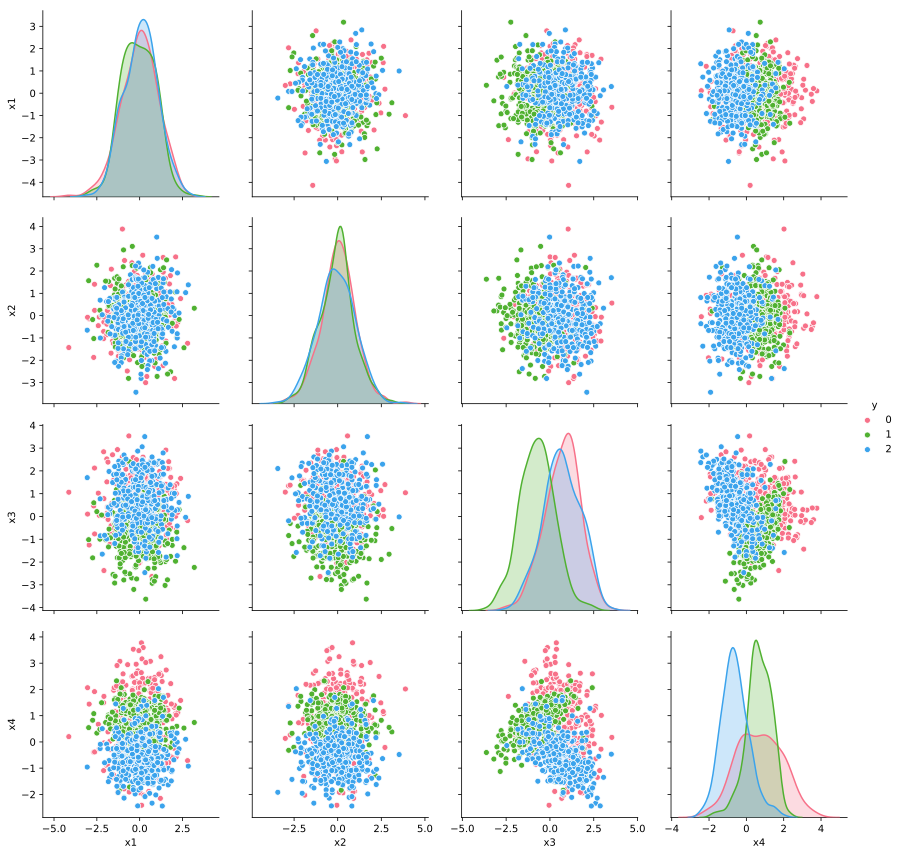

In [36]:
sb.pairplot(df, height=3,vars=['x1','x2','x3','x4'],hue="y",palette="husl")